Import

# New Section

[[[ 21  13   8]
  [ 21  13   9]
  [ 20  11   8]
  ...
  [228 182 138]
  [231 185 142]
  [228 184 140]]

 [[ 21  13   7]
  [ 21  13   9]
  [ 20  14   7]
  ...
  [228 182 136]
  [231 185 139]
  [229 183 137]]

 [[ 21  14   7]
  [ 23  13  10]
  [ 20  14   9]
  ...
  [228 182 136]
  [228 184 137]
  [229 185 138]]

 ...

 [[189 124  77]
  [214 155 109]
  [197 141 100]
  ...
  [165  86  37]
  [161  82  41]
  [143  67  29]]

 [[207 148 102]
  [201 142  99]
  [196 140  97]
  ...
  [154  74  37]
  [147  66  33]
  [145  65  31]]

 [[197 141 100]
  [195 137  99]
  [193 138  98]
  ...
  [158  73  38]
  [144  64  30]
  [143  60  29]]]


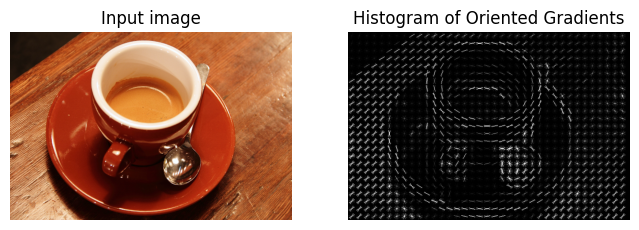

In [18]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

# import os
image_path = "./drive/MyDrive/set_data/dataset_shape/test/oval/1POO_340d8a8e-18ef-4556-a5e4-c737df311a0e.jpg"

# with open(image_path, 'rb') as f:
#   f.read() # ???



# Import the necessary libraries
from PIL import Image
from numpy import asarray


# load the image and convert into
# numpy array
img = Image.open(image_path)

# asarray() class is used to convert
# PIL images into NumPy arrays
image = asarray(img)


image = data.coffee() # at()# astronaut() # cell()

print(image)
# print(type(image))


fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 15))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [15]:

image = data.cells3d()

print(image)

[[[[2060 2058 2126 ... 4283 4091 4074]
   [2008 1952 2029 ... 4188 3739 3996]
   [1963 2299 1911 ... 4157 4465 4051]
   ...
   [1105 1169 1140 ... 2700 2880 3233]
   [1159 1068 1126 ... 2981 3266 3415]
   [ 967 1120 1124 ... 2748 3043 3558]]

  [[5311 4458 5880 ... 4220 6497 4932]
   [4078 4552 3557 ... 4552 4884 5169]
   [3414 5074 4363 ... 4078 6117 5406]
   ...
   [3983 3983 2750 ... 4410 4600 5880]
   [3604 4173 4600 ... 5548 5690 4268]
   [4078 4268 4220 ... 5359 6686 7492]]]


 [[[1804 2066 2052 ... 3909 3806 4047]
   [1874 1917 2008 ... 3797 3582 4051]
   [2008 1950 2037 ... 3911 4093 3830]
   ...
   [1233 1078  990 ... 1690 2056 2014]
   [ 899 1277  923 ... 1880 2180 2116]
   [ 938 1190 1043 ... 1994 1766 1936]]

  [[4220 4932 5074 ... 6449 6117 4932]
   [3082 4979 4505 ... 4505 6971 5880]
   [4695 4315 4695 ... 4742 5785 5074]
   ...
   [3414 3841 3462 ... 5169 4742 5027]
   [4173 3319 2798 ... 5406 4600 4837]
   [3225 3557 3651 ... 5453 5406 4837]]]


 [[[1998 2240 2271 ... 3

#HOG

In [ ]:
!pip install torchviz

In [ ]:
from torchvision import datasets, transforms
import numpy as np
from torchviz import make_dot
from IPython.display import Image
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import time
from datetime import datetime
import torchvision.models as models
import torchvision.models as tv_models
from torchvision.models import ResNet18_Weights, MobileNet_V2_Weights

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = ['diamond', 'squiggle', 'oval']
        self._prepare_dataset()

    def _prepare_dataset(self):
        for root, _, files in os.walk(self.root_dir):
            for file in files:
                if file.endswith(('.jpg', '.jpeg', '.png')):
                    self.image_paths.append(os.path.join(root, file))
                    # Extract labels from the directory structure
                    parts = root.split(os.sep)
                    shape = parts[-1]
                    shape_label = self.classes.index(shape)
                    self.labels.append(shape_label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Convert image to RGB
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)  # Apply transformations
        return image, torch.tensor(label)

Step 2: Data Preparation

In [ ]:
# Define transformations for the training, validation, and test sets
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


# Create datasets and dataloaders
dir_data = './drive/MyDrive/set_data/dataset_shape'
train_dataset = CustomImageDataset(root_dir=f"{dir_data}/train", transform=transform)
valid_dataset = CustomImageDataset(root_dir=f"{dir_data}/valid", transform=transform)
test_dataset = CustomImageDataset(root_dir=f"{dir_data}/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Visualization function
def show_transformed_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)  # Change from CxHxW to HxWxC for visualization
        image = (image * 0.5) + 0.5  # Unnormalize the image

        axes[i].imshow(image)
        axes[i].set_title(f"Label: {label.item()}")
        axes[i].axis('off')
    plt.show()

In [ ]:
# Model definition
class SimplestCNN(nn.Module):
    def __init__(self):
        super(SimplestCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 3)  # 3 shape classes: diamond, squiggle, oval

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Define the model classes
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.fc1 = nn.Linear(256 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 3)  # 3 classes: diamond, squiggle, oval

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 4096),  # Adjusted input size
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 3),  # 3 classes: diamond, squiggle, oval
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
class ResNet18(nn.Module):
    def __init__(self, num_classes=3):
        super(ResNet18, self).__init__()
        self.model = tv_models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [ ]:
class MobileNetV2(nn.Module):
    def __init__(self, num_classes=3):
        super(MobileNetV2, self).__init__()
        self.model = tv_models.mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
        self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [ ]:
def save_model(model, model_name):
  print(f"Saving model: {model_name}")
  now = datetime.now()

  # Format the date and time as "YYYY-MM-DD:HH:MM"
  formatted_now = now.strftime("%Y-%m-%d:%H:%M")
  save_dir = "./drive/MyDrive/Colab NoteBooks Training/models"
  torch.save(model, f"{save_dir}/{model_name}_{formatted_now}.pth")

In [ ]:
def save_visualization(model, model_name, size=(1,3,64,64)):
  print(f"Saving model visualization: {model_name}")

  sample_input = torch.randn(1, 3, 64, 64)  # 1 sample, 3 channels, 64x64 pixels
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  inputs = sample_input.to(device)
  # Perform a forward pass through the model to create the computational graph
  output = model(inputs)

  # Visualize the model using torchviz
  dot = make_dot(output, params=dict(model.named_parameters()))

  # Save and display the visualization
  dot.format = 'png'
  save_dir = "./drive/MyDrive/Colab NoteBooks Training/visualizations"
  dot.render(f'{save_dir}/visualization_{model_name}')

In [ ]:
def train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=12):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print("Starting training")
    start_time = time.time()

    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        running_loss = 0.0
        model.train()

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_duration = time.time() - epoch_start_time
        print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}, Time: {train_duration:.2f} seconds")

        # Validation loop
        model.eval()
        valid_loss = 0.0
        correct = 0
        total = 0
        valid_start_time = time.time()

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        valid_duration = time.time() - valid_start_time
        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Validation Loss: {valid_loss/len(valid_loader)}, Accuracy: {accuracy:.2f}%, Time: {valid_duration:.2f} seconds")

    total_time = time.time() - start_time
    print(f"Training completed in {total_time:.2f} seconds")
    return model

def evaluate(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    test_start_time = time.time()

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_duration = time.time() - test_start_time
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%, Time: {test_duration:.2f} seconds")
    return accuracy

In [ ]:
# Define the models
# 'VGG': VGG(),
# 'ResNet18': ResNet18(num_classes=3),
# 'MobileNetV2': MobileNetV2(num_classes=3)

models = {
    'SimpleCNN': SimpleCNN()
}

In [ ]:
# Train and evaluate each model
best_accuracy = 0
best_model_name = ''
best_model = None
print(device)

for model_name, model in models.items():
    # save_visualization(model, model_name)
    print(f'Training {model_name}')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # Train the model
    model = train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=10)

    # Evaluate the model
    accuracy = evaluate(model, test_loader)
    save_model(model, f'{model_name}_acc-{accuracy:.2f}')

    # Save the model if it has the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
        save_model(best_model, f'best_model_{best_model_name}')


print(f'Best model: {best_model_name} with accuracy {best_accuracy}%')

END

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.models import VGG16_Weights

# Define transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
data_dir = './drive/MyDrive/set_data/dataset_shape'
train_dataset = ImageFolder(f'{data_dir}/train', transform=transform)
valid_dataset = ImageFolder(f'{data_dir}/valid', transform=transform)
test_dataset = ImageFolder(f'{data_dir}/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pretrained VGG model and modify the final layer
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 3)  # 3 classes: diamond, squiggle, oval

# Define loss and optimizer with a smaller learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}')

        # Validation step
        model.eval()
        valid_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Validation Loss: {valid_loss/len(valid_loader)}, Accuracy: {accuracy}%')

train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20)

# Evaluate the model
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')

evaluate(model, test_loader)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 120MB/s] 


Epoch 1, Training Loss: 0.2174252615788226
Epoch 1, Validation Loss: 0.000305885171258069, Accuracy: 100.0%
Epoch 2, Training Loss: 0.011647151071464088
Epoch 2, Validation Loss: 0.07979410262578307, Accuracy: 97.95918367346938%
Epoch 3, Training Loss: 0.01498111349636789
Epoch 3, Validation Loss: 0.00015428419196394927, Accuracy: 100.0%
Epoch 4, Training Loss: 0.0001810904387680851
Epoch 4, Validation Loss: 8.353677094508072e-07, Accuracy: 100.0%
Epoch 5, Training Loss: 6.794209096319456e-05
Epoch 5, Validation Loss: 3.608853139852597e-06, Accuracy: 100.0%
Epoch 6, Training Loss: 2.030450313073883e-05
Epoch 6, Validation Loss: 1.625484102180108e-06, Accuracy: 100.0%
Epoch 7, Training Loss: 1.6695858585905696e-05
Epoch 7, Validation Loss: 3.254870808433452e-07, Accuracy: 100.0%
Epoch 8, Training Loss: 2.5393872257759235e-05
Epoch 8, Validation Loss: 2.9010030261344966e-07, Accuracy: 100.0%
Epoch 9, Training Loss: 6.321610009394864e-07
Epoch 9, Validation Loss: 1.462168266463948e-07, Ac

In [35]:
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# !rm -rf ./logs/

writer = SummaryWriter(log_dir="./runs/set")

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(example_data[i][0], cmap='gray')
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image("set_images", img_grid)

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
save_model(model, "vgg16")
save_visualization(model, 'vgg16', (1, 3, 224, 224))

In [ ]:

# # Training function with validation
# def train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=10):
#     print("Starting training")
#     start_time = time.time()

#     for epoch in range(num_epochs):
#         epoch_start_time = time.time()
#         running_loss = 0.0
#         model.train()

#         # Training loop
#         for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()

#         train_duration = time.time() - epoch_start_time
#         print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}, Time: {train_duration:.2f} seconds")

#         # Validation loop
#         model.eval()
#         valid_loss = 0.0
#         correct = 0
#         total = 0
#         valid_start_time = time.time()

#         with torch.no_grad():
#             for inputs, labels in valid_loader:
#                 inputs, labels = inputs.to(device), labels.to(device)
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)
#                 valid_loss += loss.item()

#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#         valid_duration = time.time() - valid_start_time
#         accuracy = 100 * correct / total
#         print(f"Epoch {epoch+1}, Validation Loss: {valid_loss/len(valid_loader)}, Accuracy: {accuracy:.2f}%, Time: {valid_duration:.2f} seconds")

#     total_time = time.time() - start_time
#     print(f"Training completed in {total_time:.2f} seconds")

# def evaluate(model, test_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     test_start_time = time.time()

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     test_duration = time.time() - test_start_time
#     accuracy = 100 * correct / total
#     print(f"Test Accuracy: {accuracy:.2f}%, Time: {test_duration:.2f} seconds")


In [ ]:
# train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=10)

In [ ]:
# # Evaluate the model
# evaluate(model, test_loader)

Step 3: Model Definition

In [ ]:
# class CardClassifierCNN(nn.Module):
#     def __init__(self):
#         super(CardClassifierCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(128 * 8 * 8, 256)
#         self.fc2 = nn.Linear(256, 64)
#         self.fc3 = nn.Linear(64, 3)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1, 128 * 8 * 8)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# # Initialize the model, loss function and optimizer

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")


# model = CardClassifierCNN().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# # Perform a sample input tensor with the shape (batch_size, channels, height, width)

# def save_model_vis(model, model_name):
#   sample_input = torch.randn(1, 3, 64, 64)  # 1 sample, 3 channels, 64x64 pixels


#   inputs = sample_input.to(device)
#   # Perform a forward pass through the model to create the computational graph
#   output = model(inputs)
# #
#   # Visualize the model using torchviz
#   dot = make_dot(output, params=dict(model.named_parameters()))

#   # Save and display the visualization
#   dot.format = 'png'

#   dot.render(f'model_visualization_{model_name}')

# # To display the image inline (if using a Jupyter notebook or similar environment)
# # Image(filename='model_visualization.png')

Step 4: Training and Evaluation

In [ ]:
# import time

# def train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=10):
#     print("Starting training")
#     start_time = time.time()

#     model.train()
#     train_initialization_end = time.time()

#     print(f"Finished Training Initialization - {train_initialization_end - start_time:.2f}")

#     print("Beginning Epochs")
#     for epoch in range(num_epochs):
#         epoch_start_time = time.time()
#         running_loss = 0.0
#         train_start_time = time.time()

#         # Using tqdm to visualize the training progress
#         for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs) # resets
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()

#         train_end_time = time.time()
#         train_duration = train_end_time - train_start_time
#         print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}, Time: {train_duration:.2f} seconds")

#         # Validate the model
#         model.eval()
#         valid_loss = 0.0
#         correct = 0
#         total = 0
#         valid_start_time = time.time()

#         with torch.no_grad():
#             for inputs, labels in valid_loader:
#                 inputs, labels = inputs.to(device), labels.to(device)
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)
#                 valid_loss += loss.item()
#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#         valid_end_time = time.time()
#         valid_duration = valid_end_time - valid_start_time
#         accuracy = 100 * correct / total
#         print(f"Epoch {epoch+1}, Validation Loss: {valid_loss/len(valid_loader)}, Accuracy: {accuracy:.2f}%, Time: {valid_duration:.2f} seconds")

#         model.train()
#         epoch_end_time = time.time()
#         epoch_duration = epoch_end_time - epoch_start_time
#         print(f"Epoch {epoch+1} completed in {epoch_duration:.2f} seconds")

#     total_time = time.time() - start_time
#     print(f"Training completed in {total_time:.2f} seconds")

# def evaluate(model, test_loader):
#     model.eval()
#     correct = 0
#     total = 0
#     test_start_time = time.time()

#     with torch.no_grad():
#         for inputs, labels in tqdm(test_loader, unit="batch"):
#         # for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     test_end_time = time.time()
#     test_duration = test_end_time - test_start_time
#     accuracy = 100 * correct / total
#     print(f"Test Accuracy: {accuracy:.2f}%, Time: {test_duration:.2f} seconds")


In [ ]:
# # Train the model
# train(model, train_loader, valid_loader, criterion, optimizer, num_epochs=10)

In [ ]:
# # Evaluate the model
# evaluate(model, test_loader)

Step 2: Save the Model

In [ ]:
# # Get the current date and time
# now = datetime.now()

# # Format the date and time as "YYYY-MM-DD:HH:MM"
# formatted_now = now.strftime("%Y-%m-%d:%H:%M")
# save_dir = "./drive/MyDrive/Colab NoteBooks"
# torch.save(model, f"{save_dir}/card_classifier_model_{formatted_now}.pth")

Step 3: Load the Model


In [ ]:
# # Load the entire model
# loaded_model = torch.load('./card_classifier_model.pth', map_location=torch.device('cpu'))
# loaded_model.eval()  # Set the model to evaluation mode

Step 4: Use the Model


In [ ]:
# from PIL import Image
# from torchvision import transforms

# # Define the transformations (same as during training)
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# ])

# # Load an example image
# image = Image.open('1PSO.jpg')

# # Transform the image
# image = transform(image)
# image = image.unsqueeze(0)  # Add a batch dimension

# # Make a prediction
# output = loaded_model(image)
# _, predicted_class = torch.max(output.data, 1)

# # Print the predicted class
# class_names = ['oval', 'squiggle', 'diamond']
# print(f'Predicted class: {class_names[predicted_class]}')


In [ ]:
# from PIL import Image
# from torchvision import transforms

# # Define the transformations (same as during training)
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# ])

# def classify_image(model, image_path, transform):
#     model.eval()
#     image = Image.open(image_path)
#     image = transform(image)
#     image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

#     with torch.no_grad():
#         output = model(image)
#         _, predicted = torch.max(output.data, 1)

#     class_names = train_dataset.classes  # Assuming classes are in the same order as in dataset folders
#     return class_names[predicted.item()]

# # Example usage

# image_path = './1GSS_0f212ca0-605c-4e50-add6-feb89e833c77.jpg'
# predicted_class = classify_image(loaded_model, image_path, transform)
# print(f'The predicted class for the image is: {predicted_class}')


In [ ]:
# import matplotlib.pyplot as plt

# def show_transformed_images(dataset, num_images=20):
#     fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
#     for i in range(num_images):
#         image, labels = dataset[i]
#         image = image.permute(1, 2, 0)  # Change from CxHxW to HxWxC for visualization
#         image = (image * 0.5) + 0.5  # Unnormalize the image

#         axes[i].imshow(image)
#         axes[i].set_title(f"{labels}")
#         axes[i].axis('off')
#     plt.show()

# # Example usage
# show_transformed_images(valid_dataset)
